In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

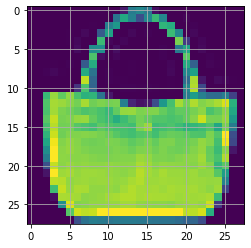

In [5]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

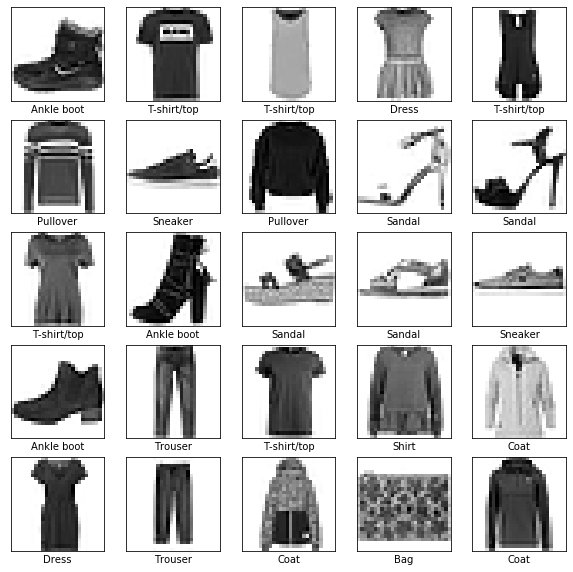

In [10]:
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [11]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), keras.layers.Dense(128, activation = tf.nn.relu), keras.layers.Dense(10, activation = tf.nn.softmax)])

In [12]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5095 - accuracy: 0.8216
Epoch 2/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3807 - accuracy: 0.8630
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3407 - accuracy: 0.8763
Epoch 4/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3160 - accuracy: 0.8838
Epoch 5/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2980 - accuracy: 0.8906


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy ', test_acc)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3536 - accuracy: 0.8711
Accuracy  0.8711


In [16]:
predictions = model.predict(test_images)

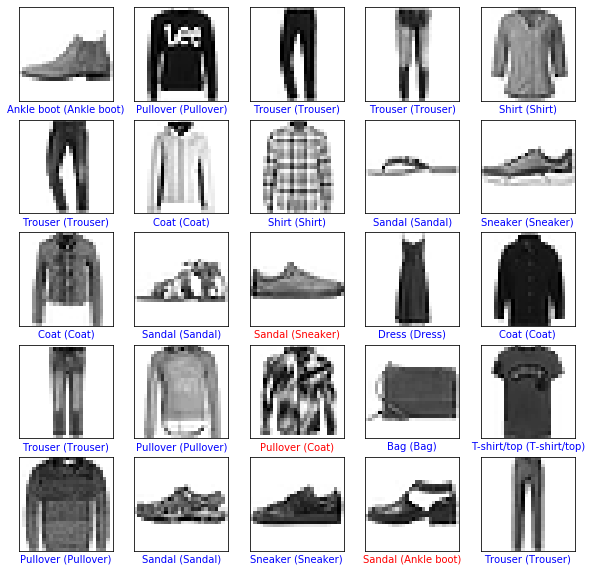

In [17]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else: 
    color = 'red'
    
  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)